## Receptor-Level Computations
NTP 640 - Computational Neuroscience
Interactively simulate neurotransmitter receptor function and computations.

Matt Jones, 2024 (Matlab live editor version)

Converted to Python John Judge, 2024


## Table of Contents

1. [Introduction](#Introduction)
    - [A Simple Kinetic Model of a Neurotransmitter Receptor](#A-Simple-Kinetic-Model-of-a-Neurotransmitter-Receptor)
        - [Discrete States and Transition Rate Constants](#Discrete-States-and-Transition-Rate-Constants)
        - [Differential Equations](#Differential-Equations)
        - [Finite Difference Equations](#Finite-Difference-Equations)
        - [The Importance of ∆t](#The-Importance-of-∆t)
2. [Modeling the System](#Modeling-the-System)
    - [How To Use This Software](#How-To-Use-This-Software)
    - [Initial Conditions and Rate Constants](#Initial-Conditions-and-Rate-Constants)
    - [Agonist Concentration and Timecourse](#Agonist-Concentration-and-Timecourse)
3. [Solve The Finite Difference Equations](#Solve-The-Finite-Difference-Equations)
4. [What Computations Can Neurotransmitter Receptors Perform?](#What-Computations-Can-Neurotransmitter-Receptors-Perform?)
    - [Impulse Response, Filtering, Convolution](#Impulse-Response,-Filtering,-Convolution)
    - [Arithmetic](#Arithmetic)
5. [Homework Exercises](#Homework-Exercises)
    - [Exercise #1 - The "Impulse Response" of a Neurotransmitter Receptor](#Exercise-#1---The-"Impulse-Response"-of-a-Neurotransmitter-Receptor)
    - [Exercise #2 - The Response to More Complex Inputs](#Exercise-#2---The-Response-to-More-Complex-Inputs)
    - [Exercise #3 - The Effect of Microscopic Receptor Affinity](#Exercise-#3---The-Effect-of-Microscopic-Receptor-Affinity)
    - [Exercise #4 - The Dose-Response Curve](#Exercise-#4---The-Dose-Response-Curve)


# Introduction
 Communication between neurons is probably a fundamental process that underlies how the brain computes things. Most of this communication is electrochemical: A chemical messenger molecule (e.g., a neurotransmitter) is released from one neuron and interacts with receptor proteins on target neurons. The end result on the target neuron depends on many things. But a logical starting point is to consider the receptor itself. What sorts of computations might be performed at the level of individual neurotransmitter receptors?
 
Here, we'll explore this question in the context of the standard "workhorse" neurotransmitter receptors (i.e., ionotropic glutamate and GABA receptors) that account for ~90% of all synaptic transmission in the central nervous system (CNS). But our purpose here is not to discuss any specific neurotransmitter/receptor system. Rather, let's discuss the common principles shared by most of them. Let's try to understand what sorts of computations any generic receptor might be able to do.
    


## A Simple Kinetic Model of a Neurotransmitter Receptor

### Discrete States and Transition Rate Constants
Most synapses (~90%) in the CNS release the neurotransmitters glutamate or GABA. The receptors for these two transmitters do opposite things. Glutamate is typically "excitatory" whereas GABA is typically "inhibitory". The receptors are not closely related, genetically, but they are very similar in the principles of how they function. They are both transmembrane protein complexes that comprise an ion channel (i.e., they are "ionotropic"). They both have binding sites for a neurotransmitter. When it binds, they both can either open (conduct ions) or desensitize (stay closed for a long time - similar to 'inactivation' in voltage-gated ion channels). 

Although there are many different kinds of receptors, with different properties, we can summarize a lot of how a "generic" ionotropic receptor works with this diagram below (i.e., a chemical kinetic scheme):   

![Activation Kinetics](images/activation_kinetics.png)

This particular hypothetical receptor has four **discrete states**, corresponding to four conformational states of the protein: Unbound (U), Bound (B), Open (O - ion conducting) and Desensitized (D - bound, closed and long-lasting). The arrows show the allowed transitions between conformations, and the text next to the arrows show the **rate constants** for making a transition. The concentration of neurotrasmitter (or agonist, [A]) increases the rate of going from U to B. This model is a reasonable first-pass description of most ionotropic neurotransmitter receptors that we know about, such as glutamate, GABA-A and nACh receptors. 

The chemical kinetic scheme diagram above is a nice graphical way of thinking about how a receptor might move between states. But it's more than that. A system composed of discrete states that can transition back and forth according to certain rate constants is an example of a Markov process. There's a large body of math dealing with Markov processes. More immediately, using the Law of Mass Action, we can convert that diagram directly into equations. Please see other sources for further details (e.g., my Neuro610 Lecture Notes). Briefly, for any state, S, the Law of Mass Action can be summarized by a differential equation:

$\frac{dS}{dt}=\sum{\text{Rates into S}} - \sum{\text{Rates out of S}}$

The rate of change of the probability of being in state S (dS/dt) is equal to the sum of all the rates leading into S minus the sum of all the rates leading out of S. Applying this reasoning to the diagram above yields a system of **coupled** differential equations:

### Differential Equations
![Differential Equations](images/diff_eq_2.png)

These equations describe the evolution of the system with time. There is one equation for each state (U, B, O, D). But they are coupled because they share terms. They all have to be solved together, as a system.

Here, rather than solving differential equations using calculus, let's convert them to a form that only requires simple algebra, and can be solved easily with basic Matlab code. For any state, S:

1) Approximate the differential dS with the **finite difference** S(t+1)-S(t). 

2) Approximate the differential dt with the **finite difference** ∆t = (t+1)-t.

3) Substitute and rearrange to yield the system of **coupled finite difference equations**:
### Finite Difference Equations
![Finite Differential Equations](images/finite_diff_eq.png)

These equations tell us that if we know the conditions at any instant in time (t), then we can compute the state probabilities at the next instant in time (t+1). In other words, we can simulate the behavior of the system.

### The Importance of ∆t

 The choice of ∆t is up to us, but is important. We want it to be *small* relative to how fast the system is changing with time. The smaller ∆t is, the closer the finite differences will be to the ininitesimal difference dt  and therefore the more *accurate* our numerical approximation will be. However, it will also require more time steps to span the same simulation time and therefore the more *costly* it will be. Choosing ∆t too small is a waste of computing resources and can even cause software crashes. On the other hand, choosing ∆t too large will yield a poor approximation and either *inaccurate* or downright preposterous results. 

Therefore, appropriate choice of ∆t will depend on the specific system being simulated and its rate constants. There is no one-size-fits-all value of ∆t. A good rule of thumb is to start with ∆t being ~10 times shorter than the fastest thing that is likely to happen in the system. For example, in the system above, suppose that the agonist can reach a concentration of [A] = 10^-3 M (Molar) and the agonist binding rate is k_on = 10^6 /M/s. Then the rate of going from U to B would be [A]k_on = 10^-3  M * 10^6 /M/s = 10^3 /s = 1000 /s. The average time spent in U before going to B would be 1/1000 /s = 1 ms. So it would be a good idea to start by choosing ∆t to be about 10 times shorter than that, or 100 µs.  

In the end, some experimentation is necessary. How do we know if we've chosen a sufficiently small ∆t? The easiest way is probably to try a smaller ∆t (e.g., ~5 times smaller than your original guess). If the simulation changes in a noticeable way, it probably means that the simulation is becoming more accurate and that your original guess was not sufficiently small. Repeat until making ∆t smaller no longer causes any noticeable difference. And then stop making ∆t smaller, to avoid wasting computational resources. Of course, what "noticeable difference" means is also up to you. 

# Modeling the System

## How To Use This Software

The code sections below illustrate how to set up a simulation of the receptor model above in Python, using the Forward Euler Method to iteratively solve the finite difference equations. Interactively change conditions (e.g., simulation length, time step size, agonist concentrations, etc) and parameters (e.g., rate constants).

The first two sections guide you to choose appropriate initial values of parameters that are available to manipulate. Some parameters may be interactively updated after the plots are made; parameter updates on sliders associated with plots are automatically shown in the matplotlib plot in real time. This helps you sweep through the parameter space without having to re-run the code.

## Initial Conditions and Rate Constants

In [86]:
# Import packages
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
from mpl_interactions import ipyplot as iplt

from ReceptorLevelComputations import ReceptorLevelComputations, widgets
rlc = ReceptorLevelComputations()
%matplotlib widget
SimNum = 0  # Keep track of the simulation results

In [87]:

# Set up the receptor states and parameters

# Define the starting probabilities of the system's states (Must sum to 1)
U_0 = 1  # Start with all receptors in Unbound 
B_0 = 0  # Bound
O_0 = 0  # Open
D_0 = 0  # Desensitized

# Manually set the rate constants if preferred (if invalid, defaults will be used)
k_on = 10**0  # Units: M^-1 s^-1 [10^6]
k_off = 10**2  # Units: s^-1 [10^2]
beta = 10**3  # Units: s^-1 [10^3]
alpha = 10**3  # Units: s^-1 [10^3]
d = 10**2  # Units: s^-1 [10^2]
r = 10**0  # Units: s^-1 [10^0]

# Interactively Define Rate Constants (defaults shown in [])
sliders = rlc.create_rc_sliders(k_on, k_off, beta, alpha, d, r)
widgets.VBox(sliders)

## Agonist Concentration and Timecourse
Run this block of code to set up the simulation conditions. You will have the option to play with these parameters later, but this blocks helps you choose a sensible starting point.

In [88]:
# Set some default parameters
StimStartFrac = 0.1  # Start the stimulus at 10% of the total simulation duration
StimEndFrac = 0.8  # End the stimulus at 80% of the total simulation duration

# Set default values manually if preferred
default_dt = -4   # timestep (dt)                            Units: s
default_tMax = -1 # duration of the simulation               Units: s
default_AgConcMax = -7 # Agonist Concentration Maximum       Units: M
default_StimType = 'PulseTrain' # Stimulus Type              Pulse Train or Noise
default_PulseDur = 1e-3
default_PulseFreq = 10
default_TrainDur = 0.04

# Or, interactively set the simulation parameters
sliders = rlc.create_simulation_sliders(default_dt, default_tMax, default_AgConcMax, default_StimType, default_PulseDur, default_PulseFreq, default_TrainDur)
widgets.VBox(sliders)

{'StimStartFrac': HBox(children=(IntSlider(value=0, description='StimStartFrac', max=49, readout=False), Label(value='0.00'))), 'StimEndFrac': HBox(children=(IntSlider(value=0, description='StimEndFrac', max=49, readout=False), Label(value='0.00'))), 'log_PulseFreq': HBox(children=(IntSlider(value=0, description='log_PulseFreq', max=49, readout=False), Label(value='-3.00'))), 'log_TrainDur': HBox(children=(IntSlider(value=0, description='log_TrainDur', max=49, readout=False), Label(value='-3.00'))), 'log_PulseDur': HBox(children=(IntSlider(value=0, description='log_PulseDur', max=49, readout=False), Label(value='-3.00'))), 'log_AgConcMax': HBox(children=(IntSlider(value=0, description='log_AgConcMax', max=49, readout=False), Label(value='-7.00')))}


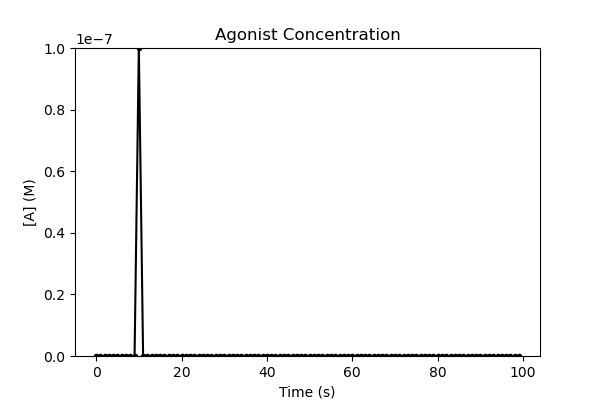

In [89]:
# pulls the rate constants and simulation parameters from the sliders
k_on, k_off, beta, alpha, d, r = rlc.get_rate_constants()
dt, tMax, AgConcMax, StimType, PulseDur, PulseFreq, TrainDur = rlc.get_simulation_params()

# Create the Time axis
time = np.arange(0, tMax, dt)  # Units: s

# Choose Stimulus Parameters, Depending on StimType
if StimType == "PulseTrain": 

    # Create the Agonist Waveform. This function is called every time the sliders are changed.
    def Ag(time, StimEndFrac, StimStartFrac, log_PulseFreq, log_TrainDur, log_PulseDur, log_AgConcMax):

        # Convert log values to linear
        PulseDur = 10**log_PulseDur
        AgConcMax = 10**log_AgConcMax
        PulseFreq = 10**log_PulseFreq
        TrainDur = 10**log_TrainDur

        # Find the indices of stimulus start and end
        StimStartIndx = int(np.ceil(StimStartFrac * len(time)))
        StimEndIndx = int(np.ceil(StimEndFrac * len(time)))

        MinPulseDur = 2 * dt
        MaxPulseDur = (StimEndFrac - StimStartFrac) * tMax
        MinPulseFreq = 1 / tMax
        MaxPulseFreq = 1 / MinPulseDur
        PulseIntervalSec = 1 / PulseFreq
        PulseIntervalPts = int(np.ceil(PulseIntervalSec / dt))

        # Create a mask to start and end stimulus as specified
        Mask = np.zeros_like(time)
        Mask[StimStartIndx:StimStartIndx + int(np.ceil(TrainDur / dt))] = 1

        # Create an Agonist Impulse Train
        ImpulseTrain = np.zeros_like(time)
        ImpulseTrain[StimStartIndx:StimEndIndx:PulseIntervalPts] = 1

        # Convolve with a square wave of PulseDur to create the final pulse profile
        PulseKernel = np.ones(int(np.ceil(PulseDur / dt)))
        StimShape = np.convolve(ImpulseTrain, PulseKernel, mode='same')

        # Create the Agonist concentration waveform. Apply the mask to start and end stimulus as specified
        Ag = StimShape * AgConcMax * Mask

        # Clip the waveform to stay within specified limits
        Ag[Ag > AgConcMax] = AgConcMax

        return Ag


    # Display the Agonist Waveform
    fig, ax = plt.subplots(figsize=(6, 4))

    # interactive plot automatically updates when sliders are changed
    ctrls = iplt.plot(time, Ag, 'k.-', 
                      StimStartFrac=(0, 0.9),
                      StimEndFrac=(0, 0.9),
                      log_PulseFreq=(-3, 3),
                      log_TrainDur=(-3, 2),
                      log_PulseDur=(-3, 2),
                      log_AgConcMax=(-7, -1))
    
    rlc.set_default_position(ctrls, 
                             StimStartFrac=(0, 0.9, 0.1), 
                             StimEndFrac=(0, 0.9, 0.8),
                             log_PulseFreq=(-3, 3, 1),
                             log_TrainDur=(-3, 2, -2),
                             log_PulseDur=(-3, 2, -3),
                             log_AgConcMax=(-7, -1, -7))

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('[A] (M)')
    ax.set_title('Agonist Concentration')
    ax.set_ylim([0, 10**(-7)])
    plt.show()

elif StimType == "Noise":  
    raise NotImplementedError('Noise is not currently working...')



# Solve The Finite Difference Equations

![Differential Equations](images/diff_eq_2.png)

# What Computations Can Neurotransmitter Receptors Perform?
Let's use the code above to do some simple thought experiments. Given how most receptors work, what "computations" can they perform? For these experiments, it will be necessary to frequently return to a starting baseline simulation, using the default parameters given above in commented square brackets. So please ensure that all of the sliders above are set to their default values. 

## Impulse Response, Filtering, Convolution
In the signal processing literature, the Impulse Response of a linear system is the output that the system produces in response to an infinitely brief and infinitely large input. In the simplest cases, knowing the Impulse Response is enough to allow you to predict the entire behavior of the system in response to any arbitrary input. In our case of neurotransmitter receptors, let's explore the Impulse Response of this system.

1) Set all parameters to their default values. 

2) Click the next  "Run From Here to End" button.

3) You should see something like this (Fig 1):

TO DO

The top trace is the time-dependent *probability* of being in the O state (P_o, i.e., the Open ion-conducting state - for ionotropic receptors, this is what we would usually call the "response" because this state affects the electrical behavior of the membrane). Here, we can provisionally consider this as the Impulse Response. The middle traces show the probabilities for all the states (U, B, O and D). Depending on your simulation, you may need to use the zoom function to see the different traces clearly. Hover your mouse over the figure, choose the magnifying glass icon, then click-and-drag to zoom. The bottom trace shows the agonist profile, [A]. In this example, it's a brief 1 ms square pulse of 1 mM. For our purposes, this is a) similar to an "Impulse" and b) similar to the actual timecourse of neurotransmitter concentration at a synapse in the CNS following release of a single packet of neurotransmitter. 

So, what computation have the receptors already performed, just by responding to a packet of neurotransmitter, according to their own intrinsic properties? Well, the input ([A]) is brief and spike-like, but the output (Open Probability, P_o) is slow and smooth. The receptor has performed a slowing and a smoothing transformation on its input. In signal processing terms, we might say that the receptor has acted like a filter. Mathematically, this might be described as the convolution of the Impulse ([A], bottom trace) with the Impulse Response (P_o, top trace). By its very nature, the receptor is already performing complex mathematical operations: filtering and convolution. In this case, it's a low-pass filter that blocks high frequencies (e.g., sharp edges) and passes low frequencies (e.g., slow and smooth components). These concepts of filtering and convolution will probably arise many more times as you continue to study brain function, in numerous different contexts. Please keep in mind that even the lowly receptor itself is already performing these computations to some degree. 

## Arithmetic
The simplest mathematical computations are probably arithmetical manipulations of numbers. For example, addition, subtraction, multiplication and division. Let's see how receptors handle numbers.

1) Set all parameters to their default values. 

2) Set PulseFreq = 500.

3) Re-run the relevant sections of code.

4) You should see something like this (Fig 2):

TO DO

Here, as the number of stimuli increases, the size of the receptor response also increases. Which arithmetical operation is this most similar to: addition, subtraction, multiplication or division? Is it exactly equal to that operation, or only approximately? If not exact, what is it about how receptors work that might prevent them from performing exact arithmetic operations? 

# Homework Exercises

Here are some things to work on at home. You may need to submit some items that might be graded. Please submit all items in a single file. Please focus on showing figures that illustrate your results, but add your comments/explanations as necessary. 

## Exercise #1 - The "Impulse Response" of a Neurotransmitter Receptor

First, reset the simulation to all the original defaults. 

a) Run a simulation with all the original defaults (i.e., 1 brief agonist pulse, AgConcMax = 10^-7 M) (100 nM). (Fig 1)

b) Run another simulation with all the original defaults, but now change AgConcMax = 10^-2 M (10 mM). 

c) Does the Open probability look different, depending on the concentration of agonist that's driving the receptor? 

d) Do the state probabilities (U, B, O, D) look different, depending on the agonist concentration that's driving the receptor? If any, what are the differences? 

e) Is the Impulse Response of this generic receptor constant? Or is it "adaptive", depending on how it is being driven by agonist concentration? 

f) Does it make sense to think of a receptor as performing a single and constant mathematical operation? If so, what is that operation? If not, why not? 

**Homework Exercise 1:**

**Make two graphs of the two simulations above (a & b). Paste those figures into the final document with your brief explanations. Briefly answer questions c-f above. One or two sentences each, if possible, please.**




## Exercise #2 - The Response to More Complex Inputs
In reality, neither we nor the brain are ever dealing with simple single spike inputs. Let's explore a slightly more complex situation. 

First, reset the simulation to all the original defaults.

a) To reset the baseline simulation, run a simulation with all the original defaults (i.e., 1 brief agonist pulse, AgConcMax = 10^-7 M) (100 nM). You should see something like Fig.1 above.

b) Run another simulation with all the original defaults, but now change PulseFreq = 500.  You should see something similar to Fig 2 above.
Previously, we might have agreed that the receptor was performing a relatively simple arithmetic operation. Maybe not perfectly, but approximately. What was that operation again?

c) Now, change AgConcMax = 10^-2 M (10 mM) and rerun the simulation. Please note: We have NOT changed the way that the receptor works. We have only changed the driving conditions (e.g., the profile of neurotransmitter exposure). The point here is to explore how the same receptor responds under varied conditions. 

d) Is the receptor response constant, or does it "adapt" to varying stimulus conditions (e.g., agonist concentration)? 

e) What "computation", or arithmetical operation, is the receptor performing on its input? Is it performing the same operation under simulation b) above versus simulation c) above? 

f) If you don't think that this receptor is performing a simple arithmetic operation, then what do you think that it is doing? What features of the stimulus is it encoding under the different stimulus conditions? Hint: the terms ""integration" and "differentiation" might be useful to ponder. 

**Homework Exercise 2:**

**Make two graphs of the two simulations above (b & c). Paste those figures into the final document with your brief explanations. Briefly answer questions d-f above. One or two sentences each, if possible, please.**


## Exercise #3 - The Effect of Microscopic Receptor Affinity

An important measure of receptor function is its "affinity" (i.e., how tightly it binds to the agonist). Affinity can be described by either the *microscopic affinity* using the dissociation constant $K_D = \frac{k_{off}}{k_{on}}$ (i.e., the tightness of agonist binding to the Unbound state) or the *macroscopic affinity* using the $EC_{50}$ (i.e., the Effective Concentration that causes 50% of the maximal response). Let's explore the effect of varying the *microscopic affinity*.

First, reset the simulation to all the original defaults.

a) To reset the baseline simulation, run a simulation with all the original defaults (i.e., 1 brief agonist pulse, AgConcMax = 10^-7 M) (100 nM). You should see something like Fig.1 above.

b) Now run three simulations and click "Run From Here To End" after each one (and save the three resulting figures):

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i) Set k_off = 10^3 /s. Calculate and write down the *microscopic affinity*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii) Set k_off = 10^2 /s. Calculate and write down the *microscopic affinity*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii) Set k_off = 10^1 /s. Calculate and write down the *microscopic affinity*.

c) Explain how varying microscopic affinity alters the shape of the impulse response. 

d) Explain why varying microscopic affinity alters the shape of the impulse response in the way that it does. 

e) Using these ideas, explain why AMPA receptors at synapses produce very fast (~5 ms) excitatory postsynaptic currents (EPSCs) whereas NMDA receptors produce very slow (~100 ms) EPSCs. 

**Homework Exercise 3:**
**Make three figures of the three simulations above (b). Paste those figures into the final document with your brief explanations. Briefly answer questions c-e above. One or two sentences each, if possible, please.**


## Exercise #4 - The Dose-Response Curve

A standard empirical measurement in receptor studies is the Dose-Response Curve, in which one applies a range of agonist concentrations (or dose) and graphs the response on the y-axis vs the dose on the x-axis. Dose response curves are usually plotted using a log10 x-axis scale:

![Dose-Response Curve](images/dose_response_curve.png)

The arrows show the macroscopic affinity or  (i.e., the Effective Concentration that causes 50% of the maximal response). This is an empirical measure of the overall tightness of binding between an agonist and the receptor. A low  (e.g., for Muscimol) means that a low concentration of agoinist can efficiently activate the receptor (i.e., high affinity) whereas a high  (e.g., for -alanine) means that it takes a lot of agonist to activate the receptor (i.e., low affinity). Let's explore the relation between microscopic vs macroscopic affinity. 

First, reset the simulation to all the original defaults (see code above, in commented square brackets "[ ]"). 

a) To reset the baseline simulation, run a simulation with all the original defaults (i.e., 1 brief agonist pulse, AgConcMax = 10^-7 M) (100 nM). You should see something like Fig.1 above.

b) Now set PulseDur = 0.04 s, set AgConcMax to 10^-1 M and click "Run From Here To End".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i) Does that simulation look right to you? Why not?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii) Try this: set dt = 10^-5 and click "Run From Here To End".  
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii) Can you explain why that helped? Let that be a lesson to you about The Importance of ∆t!

c) Run seven new simulations, sequentially using the following seven values for AgConcMax:
        
    AgConcMax_values = [10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1)]

Then write a for-loop and run the simulation for the new AgConcMax in each iteration of the loop.

    # Run the simulations
    for AgConcMax in AgConcMax_values:
        # Reset the simulation to the original defaults
        # ...
        # Set the simulation parameters
        # ...
        # Collect the results
        # ...
    # Plot the results

d) Use the following plotting code and integrate it into your script:


You should see something that looks like this (Fig 4 - save this graph using plt.savefig):


Congratulations. You have just performed a Dose-Response Curve experiment. From the graph, measure the empirical macroscopic affinity, EC<sub>50</sub> and write it down. Now, the fun part.

e) Explore how altering the receptor, for example by a making a mutation in the binding site that changes the microscopic affinity, alters the macroscopic affinity. Mutations like this often cause human neurological diseases.
  - Repeat steps c-d above, but this time set k<sub>off</sub> = 10^3 /s. Calculate the microscopic affinity and write it down.
  - From the graph, measure the empirical macroscopic affinity,  and write it down.

f) Explore how altering the receptor without changing the microscopic affinity, for example by a making a mutation in the channel gate that destabilizes the Open state, alters the macroscopic affinity.  Mutations like this also often cause human neurological diseases.
    i) Reset k_off = 10^2 /s. Calculate the microscopic affinity and write it down. 
    ii) Now reduce the opening rate to beta = 10^2 /s and increase the closing rate to alpha = 10^5 /s. 
        Repeat steps c-d above. 
        From the graph, measure the empirical macroscopic affinity,  and write it down.

g) Explain why it was important to change ∆t.

h) If things went well, your simulations should reveal that microscopic and macroscopic affinity values are rarely the same, even when the receptor properties are identical. Which one tends to have a lower value (i.e., higher apparent affinity)? Explain why this is the case.

i) In part f) above, even though microscopic affinity was the same as in part a) above, the macroscopic affinity was different. Explain why this is the case.